# Testing fourth-order finite difference method

For the following function:

$$
f(x) = \sin(x), \qquad \text{where} \quad x \in [2,6]. 
$$

The first derivative of $f(x)$ is:

$$
f'(x) = \cos(x).
$$

We use the fourth order finite difference for $f'(x)$:

Stencil Central:

$$
f'(x) \approx \frac{-f(x - 2h) + 8 f(x + h) - 8 f(x - h) + f(x + 2h)}{12h} + O(h^4).
$$

Stencil Forward:

$$
f'(x) \approx \frac{-25f(x) + 48 f(x + h) - 36 f(x + 2h) + 16 f(x + 3h) - 3 f(x + 4h)}{12h} + O(h^4).
$$

Stencil Backward:

$$
f'(x) \approx \frac{25f(x) - 48 f(x - h) + 36 f(x - 2h) - 16 f(x + 3h) + 3 f(x - 4h)}{12h} + O(h^4).
$$

First, we define the grid:

In [91]:
import numpy as np
import matplotlib.pyplot as plt

sin = np.sin
cos = np.cos

x_min, x_max = 2, 6

N = 10

x, h = np.linspace(x_min, x_max, N, retstep = True)

We can solve the finite difference problem in two different ways:

In [92]:
def diff_1st_4order_1(f, h):
    dfdx = np.zeros_like(f)

    #Central
    dfdx[2:-2] = (-f[4:] + 8 * f[3:-1] - 8 * f[1:-3] + f[:-4]) / (12 * h)

    #Forward
    dfdx[:2] = (-25 * f[:2] + 48 * f[1:3] - 36 * f[2:4] + 16 * f[3:5] - 3 * f[4:6]) / (12 * h)  

    #Backward
    dfdx[-2:] = (25 * f[-2:] - 48 * f[-3:-1] + 36 * f[-4:-2] - 16 * f[-5:-3] + 3 * f[-6:-4]) / (12 * h)
    
    return dfdx


def diff_1st_4order_2(f, h):
    n = len(f)
    dfdx = np.zeros_like(f)

    #Central
    for i in range(2, n-2):
        dfdx[i] = (-f[i + 2] + 8 * f[i + 1] - 8 * f[i - 1] + f[i - 2]) / (12 * h)
    
    #Forward
    for i in range(0, n-4):
        dfdx[i] = (-25 * f[i] + 48 * f[i + 1] - 36 * f[i + 2] + 16 * f[i + 3] - 3 * f[i + 4]) / (12 * h)
    
    #Backward
    for i in range(4, n):
        dfdx[i] = (25 * f[i] - 48 * f[i - 1] + 36 * f[i - 2] - 16 * f[i - 3] + 3 * f[i - 4]) / (12 * h)
    
    return dfdx

dfdx_1 = diff_1st_4order_1(sin(x), h)
dfdx_2 = diff_1st_4order_2(sin(x), h)

dfdx_ana = cos(x)

Finally, we plot the results.

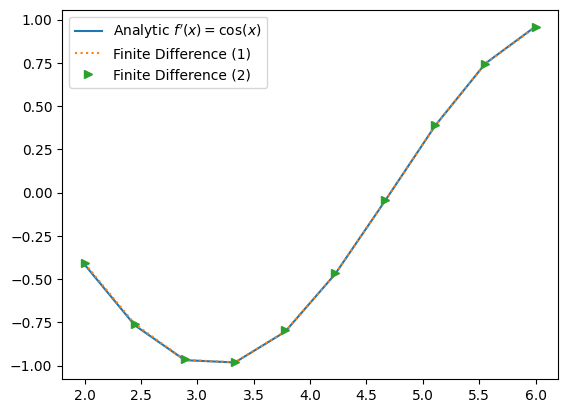

In [93]:
plt.figure()
plt.plot(x, dfdx_ana, '-', label = r"Analytic $f'(x) = \cos(x)$")
plt.plot(x, dfdx_1, ':', label = 'Finite Difference (1)')
plt.plot(x, dfdx_2, '>', label = 'Finite Difference (2)')
plt.legend()

Calculate the local error.

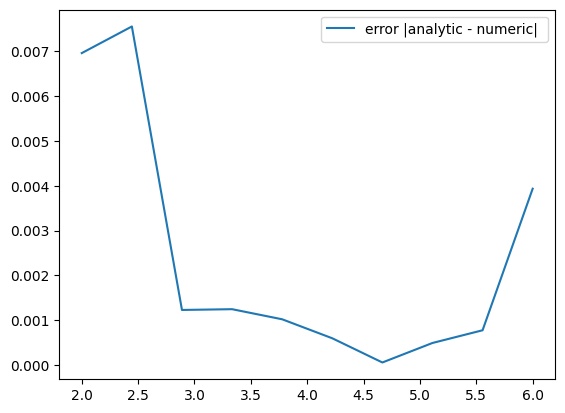

In [94]:
local_error = np.abs(dfdx_1 - dfdx_ana)
plt.plot(x, local_error, '-', label = 'error |analytic - numeric| ')
plt.legend()

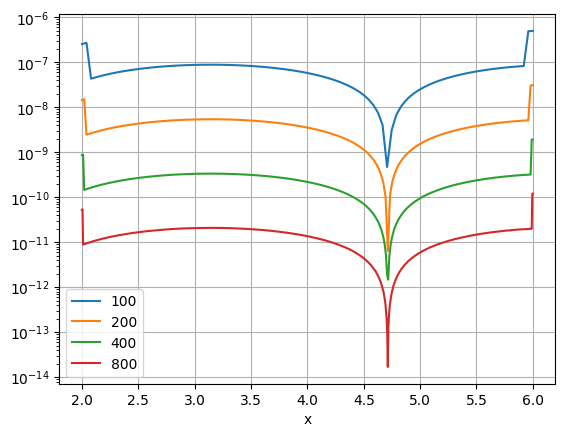

In [95]:
errors = {}
for N in [100, 200, 400, 800]:
    x, h = np.linspace(x_min, x_max, N, retstep = True)
    dfdx_ana = cos(x)
    dfdx_num = diff_1st_4order_1(sin(x), h)
    local_error = np.abs(dfdx_num - dfdx_ana)
    errors[N] = np.array([x, local_error]).T

for k, v in errors.items():
    plt.plot(v[:,0], v[:,1], label = k)
plt.yscale('log')
plt.xlabel('x')
plt.grid()
plt.legend()

## Convergence Test

The k factor of convergence is:

$$
k = \left(\frac{1}{\ln 2}\right)\ln\left(\frac{|f^{(N)} - f^{(2N)}|}{|f^{(2N)} - f^{(4N)}|}\right).
$$

In [119]:
def k_factor(f_N, f_2N, f_4N):
    f_coarse, f_medium, f_fine = f_N.copy(), f_2N[::2], f_4N[::4]

    k = (1 / np.log(2)) * np.log(np.abs(f_coarse - f_medium) / np.abs(f_medium - f_fine))
    
    return k

In [120]:
# def k_factor(f_n, f_2n, f_4n):
#     '''determines the error factor of finite difference approximation'''
#     assert 2*(f_n.shape[0]-1)==f_2n.shape[0]-1, 'f_n and  f_2n with twice as much gridspacings'
#     assert 2*(f_2n.shape[0]-1)==f_4n.shape[0]-1, 'f_2n and  f_4n with twice as much gridspacings'
    
#     fc = f_n.copy()
#     fmedium_red =f_2n[::2]
#     ffine_red =f_4n[::4]
	

#     rate =- np.log((fmedium_red - ffine_red+ 1e-17)/(fc-fmedium_red + 1e-17))/np.log(2)
#     return rate

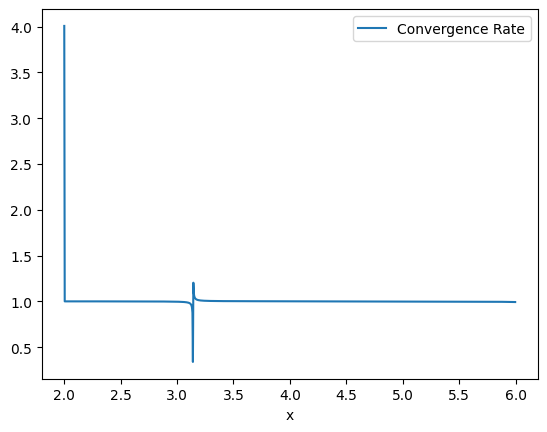

In [121]:
convergence_test = []

for N in [1000, 2000, 4000]:
    # i_index = np.arange(N+1) # +1 to include
    # dx = (x_min-x_max)/N
    # x  = x_min + i_index* dx

    x, h = np.linspace(x_min, x_max, N, retstep = True)

    dfdx = diff_1st_4order_1(sin(x), h)
    
    convergence_test.append(dfdx)

k = k_factor(*convergence_test)

plt.plot(x[::4], k, '-', label = 'Convergence Rate')
plt.xlabel('x')
plt.legend()
